<a href="https://colab.research.google.com/github/KatBCN/ML-PropertyAssessment/blob/main/ML_Preprocessing_PropertyAssessment_Buffalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

Temporary notebook to develop the preprocessing pipeline.

## Setting up the environment

In [2]:
# import libraries
from google.colab import drive 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set options
pd.set_option('display.max_columns', None) 

# mount drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/ML/ML-Project/data/
%ls 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/ML/ML-Project/data
2018_Property_Tax_Assessment.csv  train_BuffaloProperty.pkl
2019-2020_Assessment_Roll.csv     validation_BuffaloProperty.pkl
test_BuffaloProperty.pkl


## Data Exploration


In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/ML/ML-Project/data/2019-2020_Assessment_Roll.csv", dtype =object)
print(df0.shape)
print(df0.columns)

df0.head()

(93862, 51)
Index(['SBL', 'Tax District', 'Print Key', 'Front', 'Depth', 'Property Class',
       'Property Class Description', 'Previous Property Class', 'Owner1',
       'Owner2', 'Previous Owner', 'Mail1', 'Mail2', 'Mail3', 'Mail4',
       'House Number', 'Street', 'Address', 'City', 'State', 'Zipcode',
       'Zipcode Extension', 'Deed Book', 'Deed Page', 'Deed Date', 'Roll',
       'Land Value', 'Total Value', 'Sale Price', 'Year Built',
       'First Story Area', 'Second Story Area', 'Total Living Area',
       'Overall Condition', 'Building Style', 'Heat Type', 'Basement Type',
       '# of Stories', '# of Fireplaces', '# of Beds', '# of Baths',
       '# of Kitchens', 'Council District', 'Police District', 'Census Tract',
       'Census Block Group', 'Census Block', 'Neighborhood', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


,SBL,Tax District,Print Key,Front,Depth,Property Class,Property Class Description,Previous Property Class,Owner1,Owner2,Previous Owner,Mail1,Mail2,Mail3,Mail4,House Number,Street,Address,City,State,Zipcode,Zipcode Extension,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,First Story Area,Second Story Area,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
0,1113100012001122A,147003,111.31-12-1.122/A,0,0.00,873,GAS MEAS STATION,873,NATIONAL FUEL GAS DIST,CORP,NaN,NaN,NaN,6363 MAIN ST,"WILLIAMSVILLE, NY",725,WASHINGTON,NaN,BUFFALO,NY,14203,NaN,NaN,NaN,09/09/9999,6,0,13006,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1011500001001111,147012,101.15-1-1.111,0,0.00,330,COMMERCIAL VACANT LAND,330,"AROUND THE CLOCK CAR WASH,INC.",NaN,NaN,NaN,NaN,6547 EMILY LN,"LOCKPORT, NY",119,WEX,NaN,BUFFALO,NY,14211,NaN,11144,9356,09/09/9999,1,2900,2900,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0785000008001000,147009,78.50-8-1,65,82.57,311,RESIDENTIAL VACANT LAND,NaN,THE MARRANO/MARC-EQUITY CORP.,NaN,NaN,NaN,NaN,2730 TRANSIT RD,"WEST SENECA, NY",142,RACHEL VINCENT,NaN,BUFFALO,NY,14216,NaN,11331,1637,09/09/9999,1,1700,1700,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007300008009111,147003,100.73-8-9.111,50,200.00,311,RESIDENTIAL VACANT LAND,311,MARIAH LORETTA LLC,NaN,NaN,NaN,NaN,100 S WOODLAND RIDGE,"ELMA, NY",289,LOCUST,NaN,BUFFALO,NY,14204,NaN,11309,505,09/09/9999,1,3800,3800,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1321500002004000,147013,132.15-2-4,521.34,1184.60,340,INDUSTRIAL VACANT LAND,340,BUFFALO URBAN DEVELOPMENT CORP,NaN,NaN,NaN,NaN,275 OAK ST,"BUFFALO, NY",126,LABORERS WAY,NaN,BUFFALO,NY,14203,NaN,11125,6721,09/09/9999,8,337000,337000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Identifier Variable (1):
* SBL (unique)

Numeric Variables (9): 
* Front (width measured in feet)
* Depth (depth measured in feet)
* Land Value (assessed value of just land)
* Total Value (assessed value of *land* and improvements)
* Sale Price (price last sold for)
* Total Living Area (amount of living space in square feet)
* Number of Fireplaces
* Number of Beds
* Number of Baths

Categorical Variables for Property Features (6):
* Property Class Description (text)
* Year Built
* Overall Condition
* Building Style (code with unknown interpretation)
* Heat Type (code with unknown interpretation)
* Basement Type (code with unknown interpretation)

Categorical Variables for Property Location (8):
* Tax District
* Zipcode
* Council District
* Police District
* Census Tract / Census Block Group / Census Block
* Neighborhood

Variables not likely to be used (24):
* Print Key (secondary format of SBL)
* Property Class (code) 
* Previous Property Class
* Owner1 / Owner2 / Previous Owner
* Mail1 / Mail2 / Mail3 / Mail4
* House Number / Street / Address / City / State
* Zipcode Extension
* Deed Book / Deed Page / Deed Date
* Roll
* First Story Area / Second Story Area (both missing)
* Number of Stories (missing)
* Number of Kitchens (missing)

Geospatial Varaiables (3):
* Latitude / Longitude / Location


In [ ]:
nas_per_column = df0.isna().sum().sort_values()


print("Null values per column (in %, only columns with some NAs shown):\n")
print(round( nas_per_column[nas_per_column > 0] / df0.shape[0]*100, 3))

Null values per column (in %, only columns with some NAs shown):

Tax District                 0.005
House Number                 0.005
City                         0.005
State                        0.005
Mail4                        0.009
Mail3                        0.014
Zipcode                      0.047
Deed Book                    0.250
Deed Page                    0.250
Previous Property Class      0.310
Census Tract                 0.809
Census Block Group           0.809
Census Block                 0.809
Location                     0.809
Police District              0.809
Longitude                    0.809
Neighborhood                 0.809
Latitude                     0.809
Council District             0.809
Overall Condition           27.738
Building Style              27.738
Year Built                  27.738
Heat Type                   27.813
Basement Type               27.891
Owner2                      74.617
Mail2                       92.363
Mail1                   

There are several completely or nearly empty columns:
* Mail2
* Mail1
* Address
* Zipcode Extension
* Previous Owner
* First Story Area
* Second Story Area
* \# of Stories
* \# of Kitchens

We'll remove those since they add nearly no information.



Missing Values:

These missing values could be because there is no building present on the property.
* Year Built
* Overall Condition
* Building Style
* Heat Type
* Basement Type


In [ ]:
# studying a discrepancy between "Property Class" and "Property Class Description"
#property_classes = df[["Property Class", "Property Class Description"]].drop_duplicates()
#property_classes[property_classes["Property Class Description"] == "ONE STORY SMALL STRUCTURE"] # One class description has two different codes. We can go by property class description anyway. 
#df[df["Property Class Description"] == "ONE STORY SMALL STRUCTURE"].value_counts("Property Class") # Both codes sum up to ~300 rows. Using class description should be ok.




TypeError: ignored

## Data Cleaning

In [ ]:
# remove columns
empty_columns = nas_per_column[nas_per_column / df0.shape[0]*100 > 90].index.to_list()

df = df0.drop(empty_columns, axis=1)
print(df0.shape)
print(df.shape)

(93862, 51)
(93862, 42)


In [ ]:
# describe the df
df.describe(include="all")

# remove redundant columns (embedded into another column or one unique value)
redundant_columns = ["Property Class", "City", "State"]
df = df0.drop(empty_columns + redundant_columns, axis=1)


# define correct datatypes
datatypes_dict = {"category": ["Property Class Description", "Year Built", 
                               "Overall Condition", "Building Style",
                                "Tax District", "Zipcode", "Council District", 
                               "Police District", "Census Tract", 
                               "Census Block Group", "Census Block",
                               "Neighborhood", "Deed Book", "Deed Page", "Roll",
                               "Overall Condition", "Building Style", 
                               "Heat Type","Basement Type"],
                  "date":   ["Deed Date"],
                  "int":    ["# of Beds", "# of Baths", "# of Fireplaces"],
                  "float":  ["Sale Price","Land Value", "Total Value",
                            "Total Living Area"]
                  }

# decode encoded NAs
df['Deed Date'] = df['Deed Date'].replace("09/09/9999", pd.NaT)

# cast to correct datatypes
for key in datatypes_dict.keys():
  if key == "date":
    for column in datatypes_dict[key]:
      df[column] = pd.to_datetime(df[column])
  elif key == "int":
    for column in datatypes_dict[key]:
      df[column] = pd.to_numeric(df[column], errors="coerce")
  else:  
    for column in datatypes_dict[key]:
      df[column] = df[column].astype(key)


df.describe(include="all")





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


0        147003
1        147012
2        147009
3        147003
4        147013
          ...  
93857    147002
93858    147005
93859    147011
93860    147014
93861    147009
Name: Tax District, Length: 93862, dtype: category
Categories (15, object): ['147001', '147002', '147003', '147004', ..., '147012', '147013', '147014',
                          '147089']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,SBL,Tax District,Print Key,Front,Depth,Property Class Description,Previous Property Class,Owner1,Owner2,Mail3,Mail4,House Number,Street,Zipcode,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Fireplaces,# of Beds,# of Baths,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
5,0797400003003100,147010,79.74-3-3.1,62,106.00,TWO FAMILY DWELLING,220,"KORST PROPERTIES, LLC",NaN,7 CARDY LN,"DEPEW, NY",589,LISBON,14215,11154,3861,NaT,1,11400.0,52600.0,0.0,1920,1767.0,3,08,2,4,0,5,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,110590000100421022,147001,110.59-1-4.21/22,6,318.75,ONE FAMILY DWELLING,210,BOLAND JONATHAN J,NaN,22 MARINA PARK,"BUFFALO, NY",84,OJIBWA,14202,11303,7491,2016-10-21,1,13000.0,140000.0,1.0,1985,1230.0,4,14,2,1,1,2,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1008200001003000,147004,100.82-1-3,50,140.00,ONE FAMILY DWELLING,210,PRYSOCK OLA,NaN,419 HIGH ST,"BUFFALO, NY",419,HIGH,14211,10967,05571,2000-06-09,1,6800.0,63000.0,84300.0,1999,1100.0,4,05,2,4,0,3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,110590000100421013,147001,110.59-1-4.21/13,6,318.75,ONE FAMILY DWELLING,210,STEFFAN MARY,NaN,13 MARINA PARK SOUTH,"BUFFALO, NY",84,OJIBWA,14202,10989,04327,2001-09-25,1,19000.0,190000.0,145000.0,1985,1523.0,4,14,2,1,1,3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,100620000100310001,147006,100.62-1-3.1/01,65,178.84,ONE FAMILY DWELLING,210,BOROWIAK DONALD J,PROCKNAL SUSAN R,62 OAKLAND UNIT 1,"BUFFALO, NY",62,OAKLAND,14222,11167,5368,2009-08-10,1,19300.0,190000.0,1.0,1890,3159.0,3,14,2,4,0,4,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93797,0785200007002000,147009,78.52-7-2,39,130.00,ONE FAMILY DWELLING,210,GRIECO LUCILLE M,NaN,140 COVINGTON RD,"BUFFALO, NY",140,COVINGTON,14216,09479,00110,NaT,1,10500.0,140000.0,0.0,1950,1764.0,3,05,2,3,0,3,1.1,DELAWARE,District D,45,3,3006,Central Park,42.95419560463081,-78.8429220356901,"(42.95419560463081, -78.8429220356901)"
93813,1117400008001100,147004,111.74-8-1.1,60,126.00,ONE FAMILY DWELLING,210,HILL EDGAR E & MILDRED,NaN,555 CLINTON ST,"BUFFALO, NY",555,CLINTON,14210,10614,445,1993-03-08,1,7100.0,67000.0,76800.0,1992,1279.0,3,05,2,4,0,3,1.1,ELLICOTT,District C,14.02,1,1000,Broadway Fillmore,42.88155956049749,-78.85369997389107,"(42.88155956049749, -78.85369997389107)"
93817,0796300005010000,147010,79.63-5-10,40,162.00,ONE FAMILY DWELLING,210,DOMBKOWSKI RICHARD A & W,NaN,115 HIGHGATE AVE,"BUFFALO, NY",115,HIGHGATE,14214,07991,00315,NaT,1,6500.0,84000.0,0.0,1920,2142.0,3,08,2,4,1,3,1.1,UNIVERSITY,District E,47,5,5006,University Heights,42.94843309144831,-78.82349031678295,"(42.94843309144831, -78.82349031678295)"
93829,0894200001027000,147009,89.42-1-27,34,171.00,ONE FAMILY DWELLING,210,NYZNYK PETER J,NYZNYK CRYSTAL M,175 PARKSIDE,"BUFFALO, NY",175,PARKSIDE,14214,11305,4523,2016-11-22,1,17000.0,112000.0,239900.0,1915,1980.0,4,08,2,4,0,4,1.1,DELAWARE,District D,52.01,4,4002,Parkside,42.93473932115054,-78.85090273708053,"(42.93473932115054, -78.85090273708053)"


In [ ]:
df.iloc[1000:1120]

,SBL,Tax District,Print Key,Front,Depth,Property Class Description,Previous Property Class,Owner1,Owner2,Mail3,Mail4,House Number,Street,Zipcode,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Fireplaces,# of Beds,# of Baths,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
1000,1334000004048000,147014,133.40-4-48,40,106.00,ONE FAMILY DWELLING,210,SMITH ANGELA T,NaN,72 ALSACE AVE,"BUFFALO, NY",72,ALSACE,14220,11114,7740,2006-06-01,1,6200.0,89000.0,91000.0,1914,1962.0,3,08,2,4,0,4,1.0,SOUTH,District A,8,3,3005,South Park,42.847915203846014,-78.81562240291287,"(42.847915203846014, -78.81562240291287)"
1001,1237000002011000,147013,123.70-2-11,40,100.50,TWO FAMILY DWELLING,220,YATES KEVIN G,REYES CHARLENE N,8745 STEBBINS RD,"FRANKLINVILLE, NY",76,HEUSSY,14220,11293,5447,2015-05-10,1,5600.0,57100.0,1.0,1930,2542.0,3,08,2,4,2,6,2.0,LOVEJOY,District A,2,1,1003,Hopkins-Tifft,42.858811002532505,-78.82646749975385,"(42.858811002532505, -78.82646749975385)"
1002,1238000003033000,147014,123.80-3-33,40,130.00,ONE FAMILY DWELLING,210,MERCADO ALEX,MERCADO HEATHER,336 NORTH LEGION DR,"BUFFALO, NY",336,LEGION NORTH,14210,11311,6021,2017-04-05,1,6000.0,48300.0,1.0,1955,1453.0,3,04,2,4,0,3,1.0,SOUTH,District A,10,4,4002,Seneca-Cazenovia,42.856307027065476,-78.81501347526802,"(42.856307027065476, -78.81501347526802)"
1003,1117500005001400,147004,111.75-5-1.4,80,140.00,ONE FAMILY DWELLING,210,CLOUD RAYMOND,NaN,128 LORD ST,"BUFFALO, NY",128,LORD,14210,11286,2092,2015-10-01,1,8100.0,62000.0,1.0,1996,1237.0,3,05,2,4,0,3,1.1,FILLMORE,District C,15,1,1030,Broadway Fillmore,42.87982245243282,-78.84600833359396,"(42.87982245243282, -78.84600833359396)"
1004,1113600003011000,147004,111.36-3-11,33,133.00,TWO FAMILY DWELLING,220,BROADWAY FILLMORE,NEIGHBORHOOD HOUSING SER,780 FILLMORE AVE,"BUFFALO, NY",782,FILLMORE,14212,10610,104,1993-02-25,1,1800.0,25000.0,10000.0,1910,2558.0,3,08,2,4,0,4,2.1,FILLMORE,District C,166,1,1000,Broadway Fillmore,42.89458556663519,-78.83971573403689,"(42.89458556663519, -78.83971573403689)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0777500001028000,147008,77.75-1-28,30,110.00,ONE FAMILY DWELLING,210,CZEMERYNSKI MICHAEL G &,LILLIAN C,85 SAYRE,"BUFFALO, NY",85,SAYRE,14207,10185,00106,NaT,1,4100.0,33000.0,0.0,1900,1776.0,3,08,2,3,0,4,1.0,NORTH,District D,56,4,4003,West Hertel,42.947363348212996,-78.892154776472,"(42.947363348212996, -78.892154776472)"
1116,1234100003047000,147014,123.41-3-47,30,100.00,ONE FAMILY DWELLING,210,EVERITT TROY A,EVERITT LISA M,87 FREDRO ST,"BUFFALO, NY",87,FREDRO,14206,11115,567,2006-06-14,1,3800.0,68000.0,79400.0,1928,1214.0,4,08,3,3,0,4,1.0,LOVEJOY,District A,19,1,1000,Kaisertown,42.870175119972096,-78.81029913454674,"(42.870175119972096, -78.81029913454674)"
1117,1111300006008000,147003,111.13-6-8,36.14,80.00,DOWNTOWN ROW TYPE (W/COMMON WALL),481,477 MAIN OF WNY LLC,NaN,477 MAIN ST,"BUFFALO, NY",477,MAIN,14203,11322,732,2017-11-28,1,28700.0,282000.0,975000.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,ELLICOTT,District B,165,1,1046,Central,42.886861941234066,-78.87365430949951,"(42.886861941234066, -78.87365430949951)"
1118,1335600004020000,147014,133.56-4-20,35,117.00,ONE FAMILY DWELLING,210,SEIFERT KATHLEEN M,NaN,155 MARIEMONT,"BUFFALO, NY",155,MARIEMONT,14220,11090,9491,2005-02-15,1,5900.0,66500.0,63500.0,1928,1121.0,3,08,2,4,0,2,1.0,SOUTH,District A,6,1,1004,South Park,42.840948446948026,-78.81783747910872,"(42.840948446948026, -78.81783747910872)"


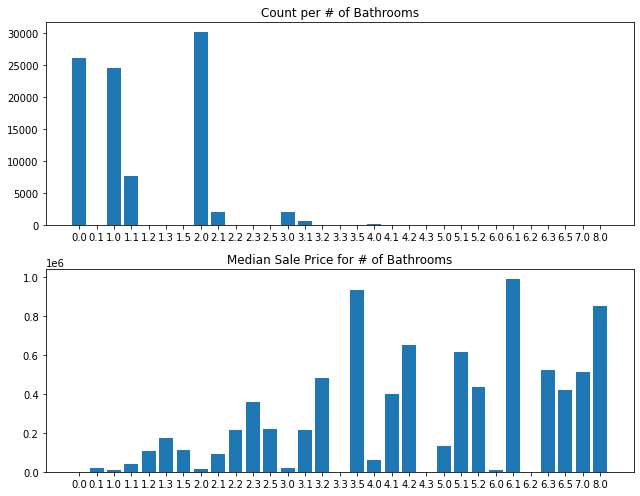

In [ ]:
df[df["# of Baths"] % 1 != 0]["# of Baths"].unique()

count_by_bath_n = df[["# of Baths", "Sale Price"]].groupby(["# of Baths"]).count()[["Sale Price"]]
median_by_bath_n = df[["# of Baths", "Sale Price"]].groupby(["# of Baths"]).median()[["Sale Price"]]


img, (ax1, ax2) = plt.subplots(2,1, figsize=(9,7))
ax1.bar(count_by_bath_n.index.astype(str), count_by_bath_n["Sale Price"])
ax2.bar(median_by_bath_n.index.astype(str), median_by_bath_n["Sale Price"])
ax1.set_title("Count per # of Bathrooms")
ax2.set_title("Median Sale Price for # of Bathrooms")
img.tight_layout()
img.show()

0         True
1         True
2         True
3         True
4         True
         ...  
93857     True
93858     True
93859     True
93860    False
93861    False
Name: Sale Price, Length: 93862, dtype: bool


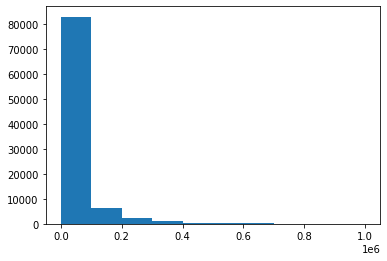

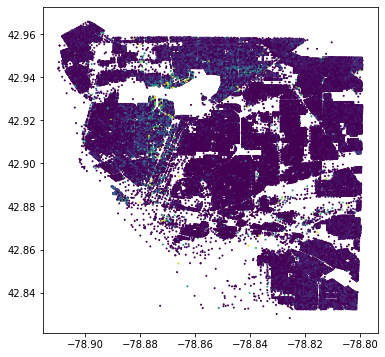

In [ ]:
# plot point map of prices 
print(df["Sale Price"] < 50000)
plt.hist(df[ df["Sale Price"] <= 1000000]["Sale Price"])
plt.show()

df_under1M = df[ df["Sale Price"] <= 1000000]

fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(df_under1M["Longitude"], df_under1M["Latitude"], c = df_under1M["Sale Price"], s=1)
fig.show()

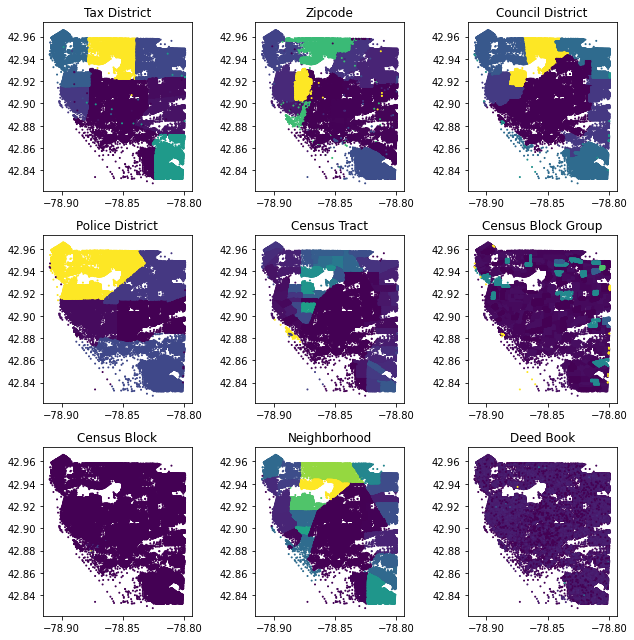

In [ ]:
map_variables = ["Tax District", "Zipcode", "Council District", "Police District",
                               "Census Tract", "Census Block Group", 
                               "Census Block","Neighborhood", "Deed Book"]

fig, axs = plt.subplots(3, 3, figsize=(9,9))


k = 0
for i in range(0,3):
  for j in range(0,3):
    
    census_mean_prices = df.groupby([map_variables[k]]).median()[["Sale Price"]]

    df_join = df[[map_variables[k], "Latitude", "Longitude"]].set_index(map_variables[k]).join(census_mean_prices,  rsuffix="R")

    axs[i, j].scatter(df_join["Longitude"], df_join["Latitude"], c = df_join["Sale Price"], s=1)
    axs[i, j].set_title(map_variables[k])

    k += 1

plt.tight_layout()
plt.show()